In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import HMC, MCMC

In [2]:
def banana(bananicity=0.75):
    x = numpyro.sample('x', dist.Normal(0, 1))
    y = numpyro.sample('y', dist.Normal(bananicity * (x**2 - 1.0), np.sqrt(1.0 - bananicity**2)))

In [3]:
kernel = HMC(banana, step_size=0.1, trajectory_length=1)

mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)

mcmc.run(rng_key, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:01<00:00, 666.08it/s, 10 steps of size 1.00e-01. acc. prob=0.99]


In [4]:
samples = mcmc.get_samples()

([<matplotlib.lines.Line2D at 0x7f7b0c569160>],
 [<matplotlib.lines.Line2D at 0x7f7ab87f3250>])

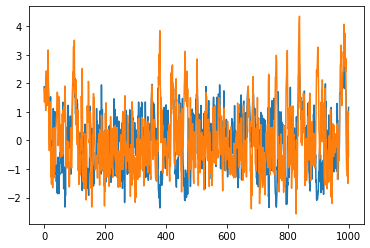

In [5]:
plt.plot(samples["x"]), plt.plot(samples["y"])

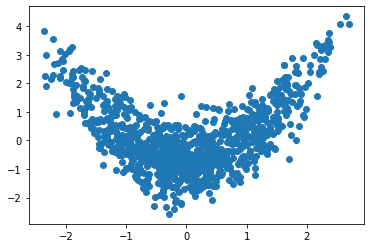

In [6]:
plt.scatter(x=samples["x"], y=samples["y"])

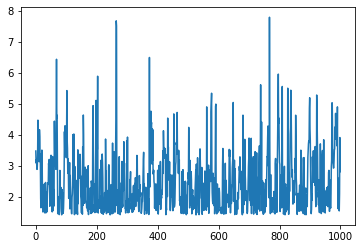

In [7]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4., 996.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

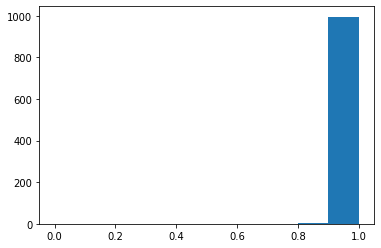

In [8]:
plt.hist(ap, range=(0,1))